# Aulas 26 e 27 - Decision Tree e Random Forest

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df = pd.read_csv('kyphosis.csv')

In [49]:
df.shape

(81, 4)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [21]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


Análise Exploratória de Dados

In [22]:
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


In [25]:
df.Kyphosis.value_counts()

absent     64
present    17
Name: Kyphosis, dtype: int64

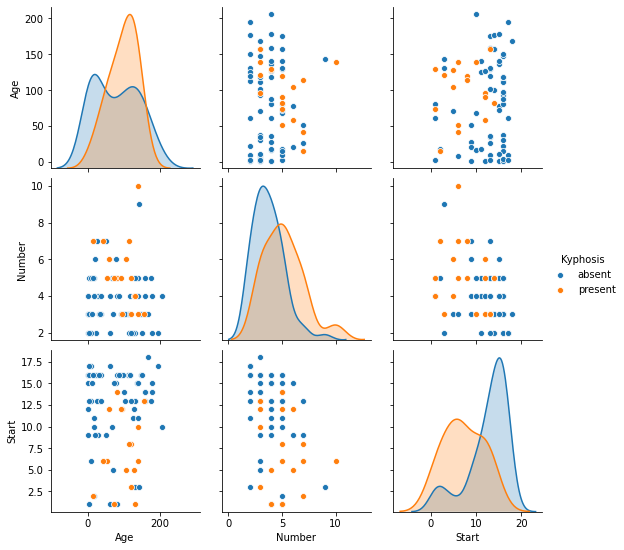

In [29]:
sns.pairplot(df, hue='Kyphosis')

Divisão treino-teste

In [30]:
from sklearn.model_selection import train_test_split

X = df.drop('Kyphosis', axis=1)
y = df['Kyphosis']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Criando o modelo de Decision Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()

# Treinando o modelo
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

Previsão e Avaliação

In [38]:
y_predicted = dtree.predict(X_test)

In [40]:
from sklearn.metrics import classification_report, confusion_matrix

conf_matrix = confusion_matrix(y_test, y_predicted)
print(conf_matrix)

[[17  2]
 [ 5  1]]


In [41]:
class_report = classification_report(y_test, y_predicted)
print(class_report)

              precision    recall  f1-score   support

      absent       0.77      0.89      0.83        19
     present       0.33      0.17      0.22         6

    accuracy                           0.72        25
   macro avg       0.55      0.53      0.53        25
weighted avg       0.67      0.72      0.68        25



Visualizando a Árvore de Decisão criada

In [48]:
X.columns

Index(['Age', 'Number', 'Start'], dtype='object')

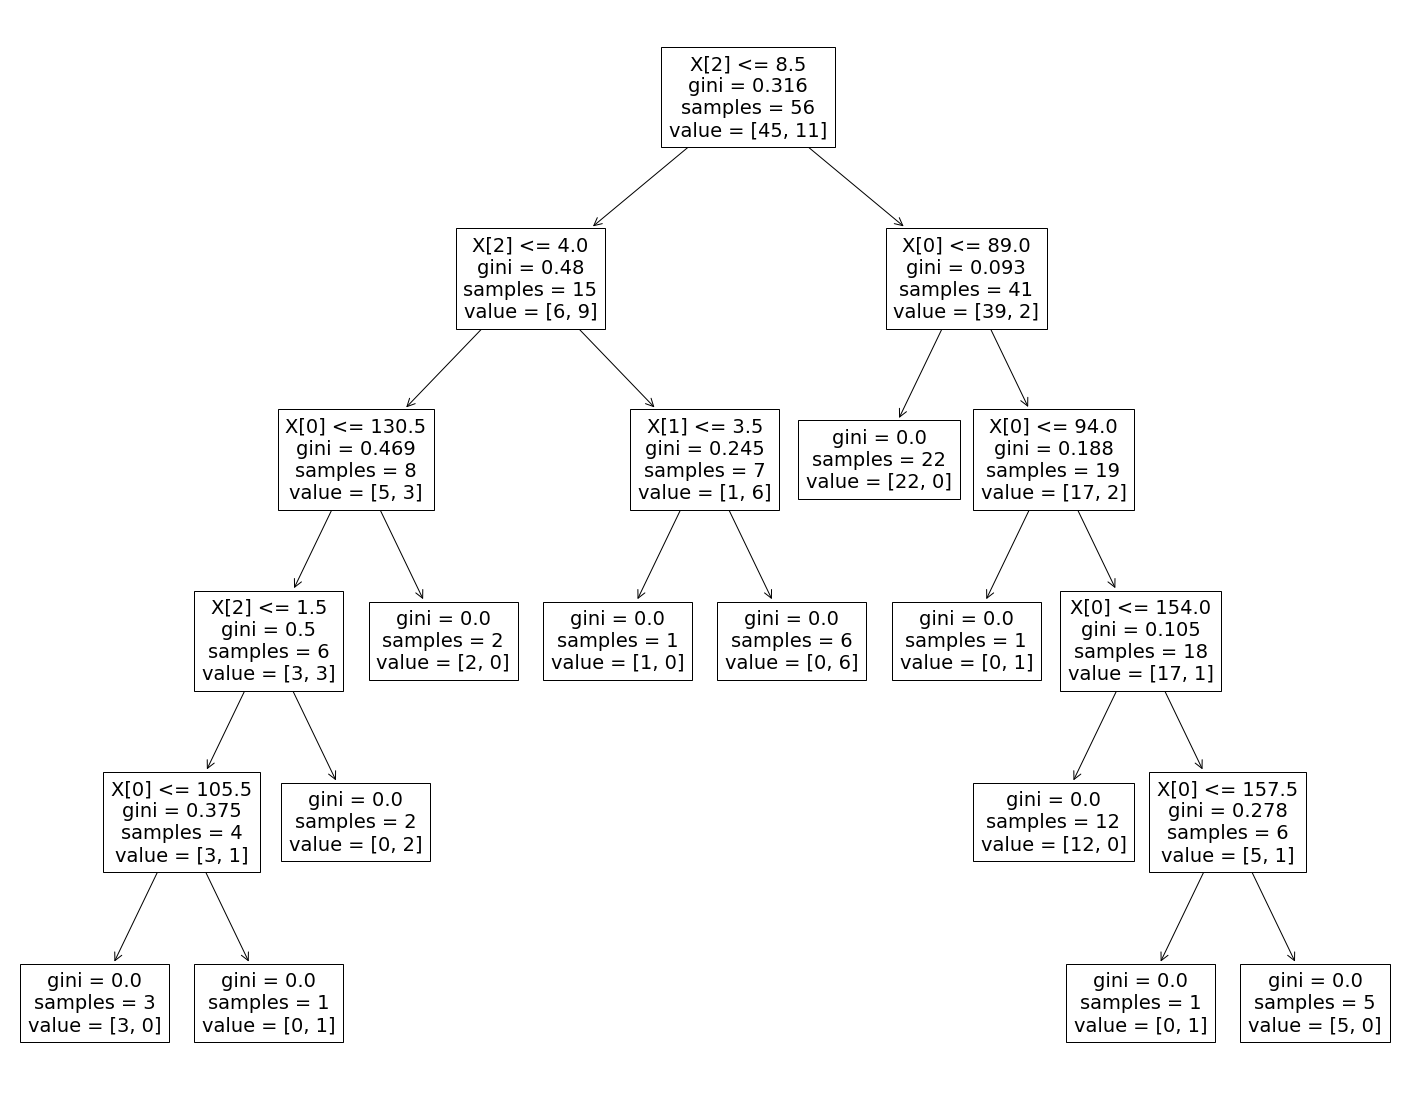

In [47]:
from sklearn import tree

plt.figure(figsize=(25, 20))
tree.plot_tree(dtree)
plt.show() 

Classificação via Random Tree

In [51]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [52]:
# Fazendo as predições com o modelo de Random Forest
y_pred_rfc = rfc.predict(X_test)

In [54]:
conf_matrix_rfc = confusion_matrix(y_test, y_pred_rfc)
print(conf_matrix_rfc)

[[19  0]
 [ 5  1]]


In [55]:
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

      absent       0.79      1.00      0.88        19
     present       1.00      0.17      0.29         6

    accuracy                           0.80        25
   macro avg       0.90      0.58      0.58        25
weighted avg       0.84      0.80      0.74        25



Visualizando uma árvore qualquer dentro da nossa Random Forest

In [67]:
any_tree = rfc.estimators_[49]

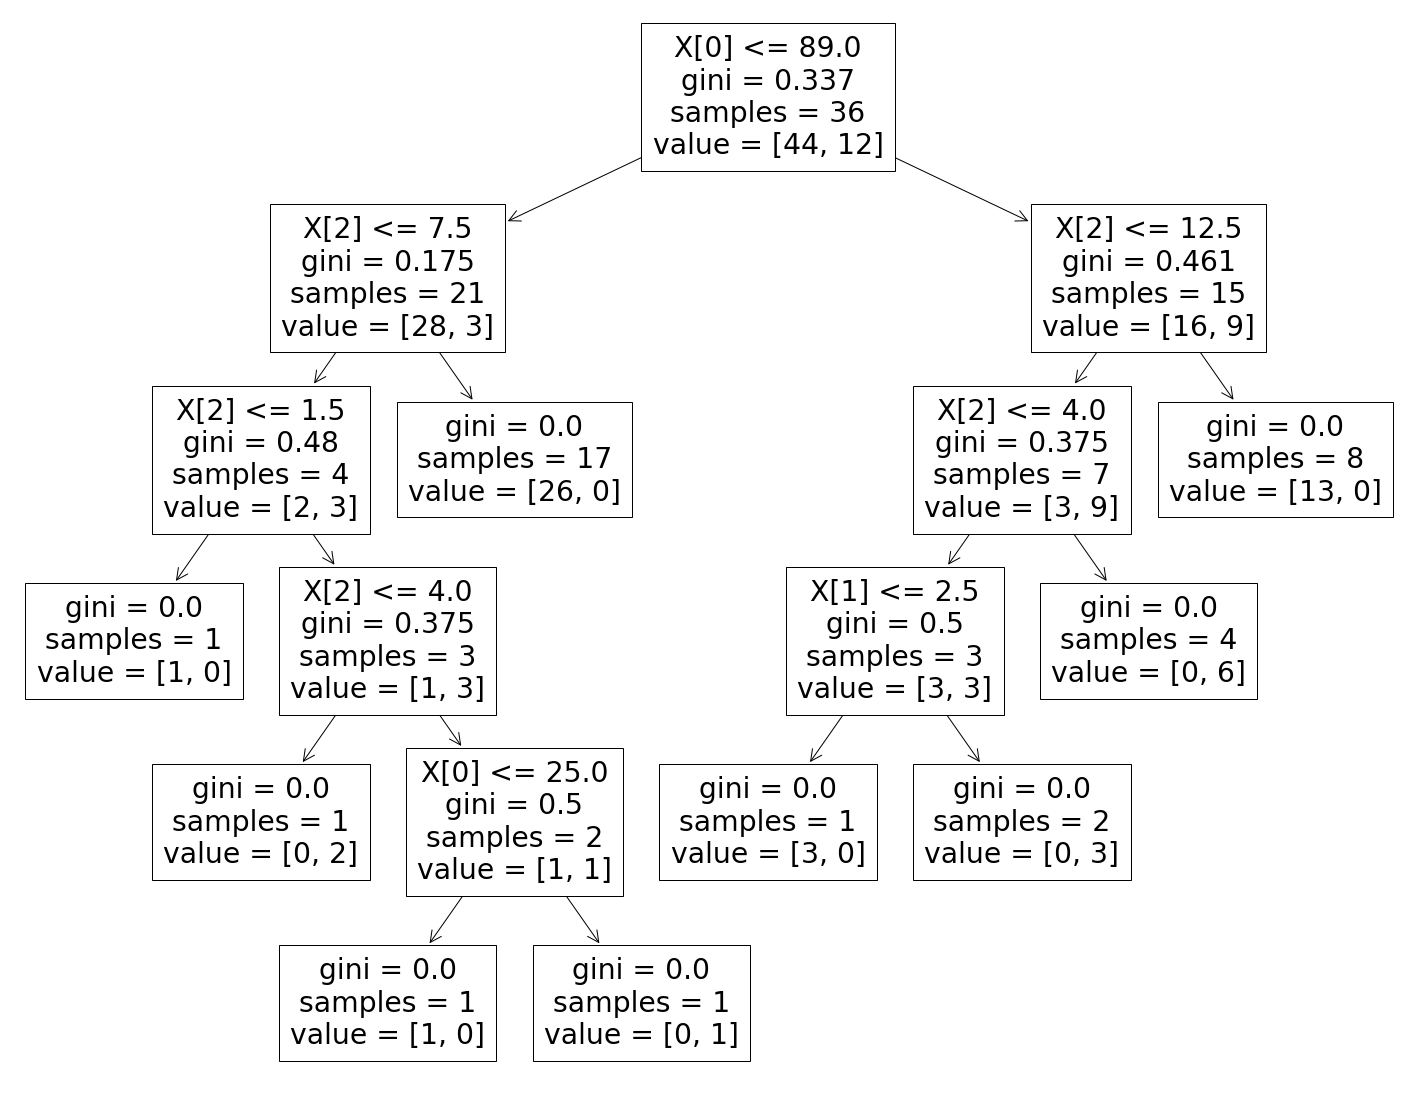

In [68]:
plt.figure(figsize=(25, 20))
tree.plot_tree(any_tree)
plt.show() 

In [78]:
from sklearn.model_selection import GridSearchCV

random_forest_tuning = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [80, 100, 200, 500, 800, 1000],
    'max_features': ['auto', 'sqrt'],
    'bootstrap' : [True, False],
    'class_weight' : ['balanced', 'balanced_subsample', None]
}

grid_search = GridSearchCV(estimator=random_forest_tuning, 
                           param_grid=param_grid, 
                           cv=3,
                          verbose=1,
                          n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   26.1s


KeyboardInterrupt: 

In [76]:
grid_search.best_params_

{'bootstrap': True,
 'class_weight': 'balanced',
 'max_features': 'auto',
 'n_estimators': 100}

In [77]:
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Resultados do Grid Seach: O Grid Search, com os parâmetros testados, não resultou em melhor performance de classificação da Random Forest no conjunto de teste.

In [74]:
y_pred_grid_search = grid_search.predict(X_test)

In [75]:
print(classification_report(y_test, y_pred_grid_search))

              precision    recall  f1-score   support

      absent       0.79      1.00      0.88        19
     present       1.00      0.17      0.29         6

    accuracy                           0.80        25
   macro avg       0.90      0.58      0.58        25
weighted avg       0.84      0.80      0.74        25

